In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
tb = pd.read_csv('/Users/iswetha/ironhack/dataV2-labs/module-2/Week_6_Module_2_Project/data/TB_burden_age_sex_2020-11-16_clean.csv')
tb.head()

,country,iso2,iso3,iso_numeric,year,measure,unit,age_group,sex,risk_factor,best,lo,hi
0,Afghanistan,AF,AFG,4,2019,inc,num,0-14,a,all,15000,7900.0,22000.0
1,Afghanistan,AF,AFG,4,2019,inc,num,0-14,f,all,7300,2400.0,12000.0
2,Afghanistan,AF,AFG,4,2019,inc,num,0-14,m,all,7800,2600.0,13000.0
3,Afghanistan,AF,AFG,4,2019,inc,num,0-4,f,all,2900,0.0,7200.0
4,Afghanistan,AF,AFG,4,2019,inc,num,0-4,m,all,3400,0.0,8500.0


In [4]:
import sqlite3
from pandas import DataFrame

conn = sqlite3.connect('TestDB2.db')
c = conn.cursor()

# c.execute('CREATE TABLE tb_data (country text, iso2 text, iso3 text, iso_numeric number, year number, measure text, unit text, age_group text, sex text, risk_factor text, best number, lo number, hi number)')
# conn.commit()

tb.to_sql('tb_data', conn, if_exists='replace', index = False)
 
c.execute('''  
SELECT * FROM tb_data
          ''')

df = DataFrame(c.fetchall(), columns=['country','iso2', 'iso3', 'iso_numeric', 'year', 'measure', 'unit', 'age_group', 'sex', 'risk_factor', 'best', 'lo', 'hi'])    
df.head()

,country,iso2,iso3,iso_numeric,year,measure,unit,age_group,sex,risk_factor,best,lo,hi
0,Afghanistan,AF,AFG,4,2019,inc,num,0-14,a,all,15000,7900.0,22000.0
1,Afghanistan,AF,AFG,4,2019,inc,num,0-14,f,all,7300,2400.0,12000.0
2,Afghanistan,AF,AFG,4,2019,inc,num,0-14,m,all,7800,2600.0,13000.0
3,Afghanistan,AF,AFG,4,2019,inc,num,0-4,f,all,2900,0.0,7200.0
4,Afghanistan,AF,AFG,4,2019,inc,num,0-4,m,all,3400,0.0,8500.0


In [8]:
age_group_2020 = df.loc[(df['age_group'] == '0-14') | (df['age_group'] == '15-24') | (df['age_group'] == '25-34') | (df['age_group'] == '35-44') | (df['age_group'] == '45-54') | (df['age_group'] == '55-64') | (df['age_group'] == '65plus')]
age_group_2020

,country,iso2,iso3,iso_numeric,year,measure,unit,age_group,sex,risk_factor,best,lo,hi
0,Afghanistan,AF,AFG,4,2019,inc,num,0-14,a,all,15000,7900.0,22000.0
1,Afghanistan,AF,AFG,4,2019,inc,num,0-14,f,all,7300,2400.0,12000.0
2,Afghanistan,AF,AFG,4,2019,inc,num,0-14,m,all,7800,2600.0,13000.0
5,Afghanistan,AF,AFG,4,2019,inc,num,15-24,f,all,7400,0.0,18000.0
6,Afghanistan,AF,AFG,4,2019,inc,num,15-24,m,all,5600,0.0,14000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7203,Zimbabwe,ZW,ZWE,716,2019,inc,num,45-54,m,all,2500,160.0,4900.0
7206,Zimbabwe,ZW,ZWE,716,2019,inc,num,55-64,f,all,1000,63.0,2000.0
7207,Zimbabwe,ZW,ZWE,716,2019,inc,num,55-64,m,all,1400,85.0,2700.0
7208,Zimbabwe,ZW,ZWE,716,2019,inc,num,65plus,f,all,1200,74.0,2300.0


In [9]:
age_group_2020_agg = age_group_2020.pivot_table(index=["country"], columns = ['age_group'],aggfunc={'best':'mean'})
age_group_2020_agg

best          \
age_group                                                   0-14   15-24   
country                                                                    
Afghanistan                                         10033.333333  6500.0   
Albania                                                 8.666667    34.0   
Algeria                                              1346.666667  2600.0   
American Samoa                                          0.000000     0.0   
Andorra                                                 0.000000     0.0   
...                                                          ...     ...   
Wallis and Futuna Islands                               0.000000     0.0   
Yemen                                                1210.000000  1200.0   
Zambia                                               4266.666667  4800.0   
Zimbabwe                                             1800.000000  1850.0   
occupied Palestinian territory, including east ...      0.000000     2.0   

                                                                            \
age_group                                            25-34   35-44   45-54   
country                                                                      
Afghanistan                                         6700.0  5000.0  4000.0   
Albania                                               46.0    29.5    26.5   
Algeria                                             3050.0  2200.0  1450.0   
American Samoa                                         0.0     0.5     0.0   
Andorra                                                1.0     0.0     0.0   
...                                                    ...     ...     ...   
Wallis and Futuna Islands                              0.0     0.0     0.0   
Yemen                                               1350.0  1050.0   895.0   
Zambia                                              7050.0  6700.0  4100.0   
Zimbabwe                                            3200.0  3700.0  2000.0   
occupied Palestinian territory, including east ...     2.0     0.5     3.5   

                                                                    
age_group                                            55-64  65plus  
country                                                             
Afghanistan                                         3550.0  2650.0  
Albania                                               36.0    58.5  
Algeria                                             1080.0  1700.0  
American Samoa                                         0.5     0.0  
Andorra                                                0.5     1.0  
...                                                    ...     ...  
Wallis and Futuna Islands                              0.0     0.5  
Yemen                                                805.0   750.0  
Zambia                                              2100.0  1800.0  
Zimbabwe                                            1200.0  1250.0  
occupied Palestinian territory, including east ...     1.0     3.5  

[214 rows x 7 columns]

In [15]:
age_group_affected_2020 = age_group_2020_agg.mean()

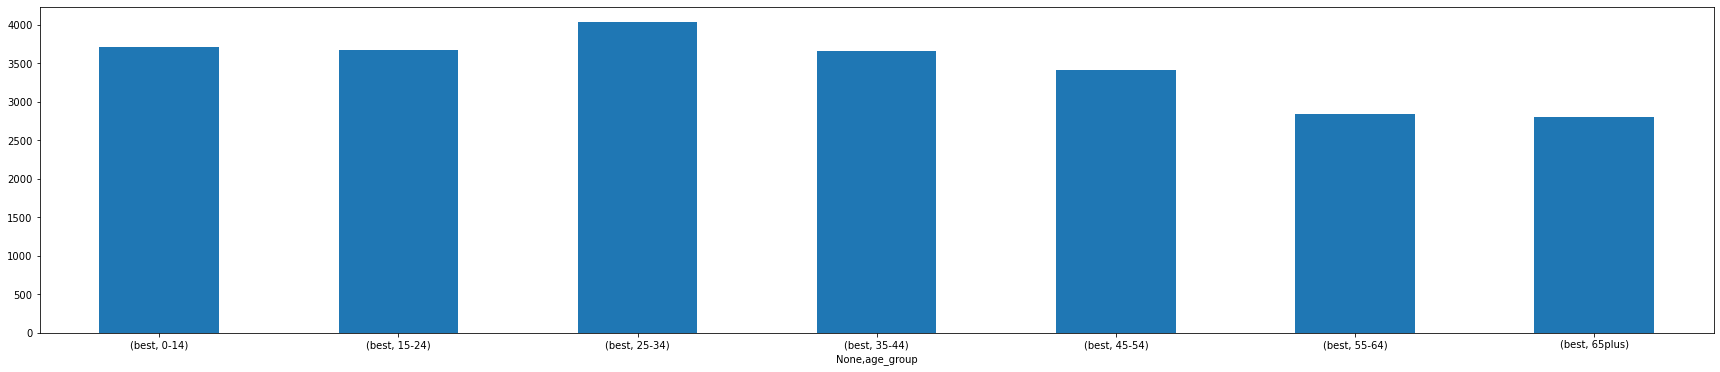

In [16]:
ax = age_group_affected_2020.plot.bar(rot=0, figsize=(30, 6))

In [17]:
tb_2019 = pd.read_csv('/Users/iswetha/ironhack/dataV2-labs/module-2/Week_6_Module_2_Project/data/TB_burden_age_sex_2020-06-14_clean.csv')
tb_2019.head()

,country,iso2,iso3,iso_numeric,year,measure,unit,age_group,sex,risk_factor,best,lo,hi
0,Afghanistan,AF,AFG,4,2018,inc,num,0-14,a,all,14000,7400.0,21000.0
1,Afghanistan,AF,AFG,4,2018,inc,num,0-14,f,all,6800,2200.0,11000.0
2,Afghanistan,AF,AFG,4,2018,inc,num,0-14,m,all,7300,2400.0,12000.0
3,Afghanistan,AF,AFG,4,2018,inc,num,0-4,f,all,2700,0.0,6700.0
4,Afghanistan,AF,AFG,4,2018,inc,num,0-4,m,all,3200,0.0,8100.0


In [18]:
import sqlite3
from pandas import DataFrame

conn = sqlite3.connect('TestDB2.db')
c = conn.cursor()

# c.execute('CREATE TABLE tb_2019_data (country text, iso2 text, iso3 text, iso_numeric number, year number, measure text, unit text, age_group text, sex text, risk_factor text, best number, lo number, hi number)')
# conn.commit()

tb_2019.to_sql('tb_2019_data', conn, if_exists='replace', index = False)
 
c.execute('''  
SELECT * FROM tb_2019_data
          ''')

df_2019 = DataFrame(c.fetchall(), columns=['country','iso2', 'iso3', 'iso_numeric', 'year', 'measure', 'unit', 'age_group', 'sex', 'risk_factor', 'best', 'lo', 'hi'])    
df_2019.head()

,country,iso2,iso3,iso_numeric,year,measure,unit,age_group,sex,risk_factor,best,lo,hi
0,Afghanistan,AF,AFG,4,2018,inc,num,0-14,a,all,14000,7400.0,21000.0
1,Afghanistan,AF,AFG,4,2018,inc,num,0-14,f,all,6800,2200.0,11000.0
2,Afghanistan,AF,AFG,4,2018,inc,num,0-14,m,all,7300,2400.0,12000.0
3,Afghanistan,AF,AFG,4,2018,inc,num,0-4,f,all,2700,0.0,6700.0
4,Afghanistan,AF,AFG,4,2018,inc,num,0-4,m,all,3200,0.0,8100.0


In [19]:
age_group_2019 = df_2019.loc[(df_2019['age_group'] == '0-14') | (df_2019['age_group'] == '15-24') | (df_2019['age_group'] == '25-34') | (df_2019['age_group'] == '35-44') | (df_2019['age_group'] == '45-54') | (df_2019['age_group'] == '55-64') | (df_2019['age_group'] == '65plus')]
age_group_2019

,country,iso2,iso3,iso_numeric,year,measure,unit,age_group,sex,risk_factor,best,lo,hi
0,Afghanistan,AF,AFG,4,2018,inc,num,0-14,a,all,14000,7400.0,21000.0
1,Afghanistan,AF,AFG,4,2018,inc,num,0-14,f,all,6800,2200.0,11000.0
2,Afghanistan,AF,AFG,4,2018,inc,num,0-14,m,all,7300,2400.0,12000.0
5,Afghanistan,AF,AFG,4,2018,inc,num,15-24,f,all,7400,0.0,18000.0
6,Afghanistan,AF,AFG,4,2018,inc,num,15-24,m,all,5900,0.0,15000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7204,Zimbabwe,ZW,ZWE,716,2018,inc,num,45-54,m,all,2600,200.0,5000.0
7207,Zimbabwe,ZW,ZWE,716,2018,inc,num,55-64,f,all,990,75.0,1900.0
7208,Zimbabwe,ZW,ZWE,716,2018,inc,num,55-64,m,all,1500,110.0,2800.0
7209,Zimbabwe,ZW,ZWE,716,2018,inc,num,65plus,f,all,1100,84.0,2200.0


In [20]:
age_group_2019_agg = age_group_2019.pivot_table(index=["country"], columns = ['age_group'],aggfunc={'best':'mean'})
age_group_2019_agg

best                                  \
age_group                         0-14   15-24   25-34   35-44   45-54   
country                                                                  
Afghanistan                9366.666667  6650.0  5600.0  4950.0  3850.0   
Albania                       3.333333    46.5    48.0    21.5    33.0   
Algeria                    1433.333333  3600.0  3350.0  2300.0  1500.0   
American Samoa                0.000000     0.0     0.0     0.0     0.0   
Andorra                       0.000000     0.0     1.0     0.0     0.0   
...                                ...     ...     ...     ...     ...   
Wallis and Futuna Islands     0.000000     0.0     0.0     0.0     0.0   
West Bank and Gaza Strip      2.333333     2.5     2.5     4.0     1.0   
Yemen                       623.333333  1300.0  1400.0  1150.0   955.0   
Zambia                     4233.333333  4950.0  7400.0  6950.0  3750.0   
Zimbabwe                   1633.333333  1850.0  3550.0  3900.0  2050.0   

                                           
age_group                   55-64  65plus  
country                                    
Afghanistan                3500.0  3550.0  
Albania                      35.5    66.0  
Algeria                    1130.0  1650.0  
American Samoa                0.0     0.0  
Andorra                       0.0     0.0  
...                           ...     ...  
Wallis and Futuna Islands     0.0     0.0  
West Bank and Gaza Strip      1.5     4.5  
Yemen                       780.0   845.0  
Zambia                     2050.0  1750.0  
Zimbabwe                   1245.0  1300.0  

[214 rows x 7 columns]

In [21]:
age_group_affected_2019 = age_group_2019_agg.mean()
age_group_affected_2019

      age_group
best  0-14         3484.088785
      15-24        3713.929907
      25-34        4129.890187
      35-44        3716.929907
      45-54        3565.362150
      55-64        2791.420561
      65plus       2821.764019
dtype: float64

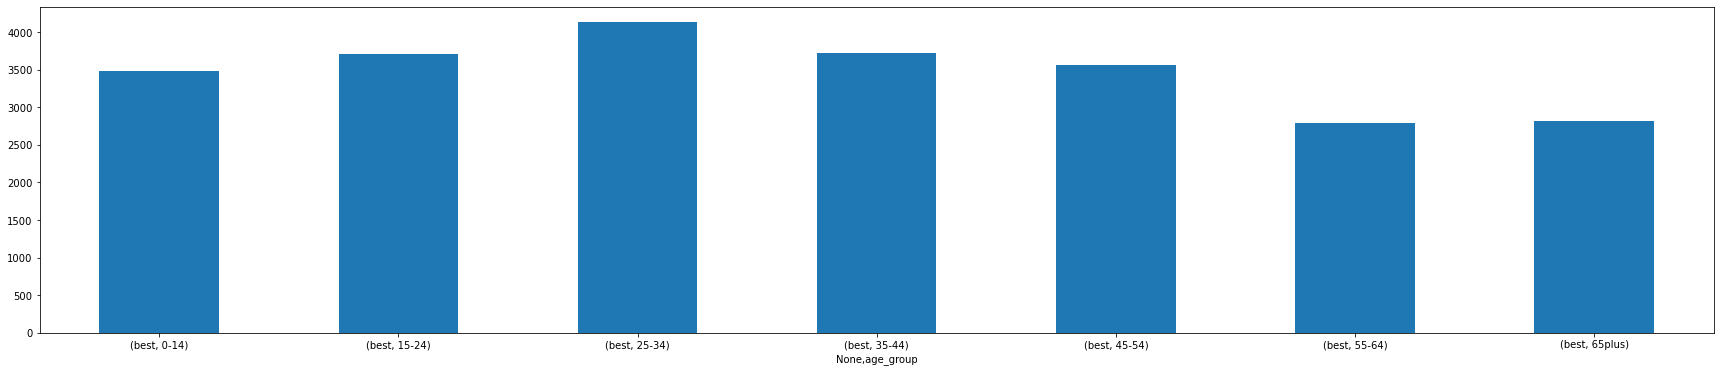

In [22]:
ax = age_group_affected_2019.plot.bar(rot=0, figsize=(30, 6))

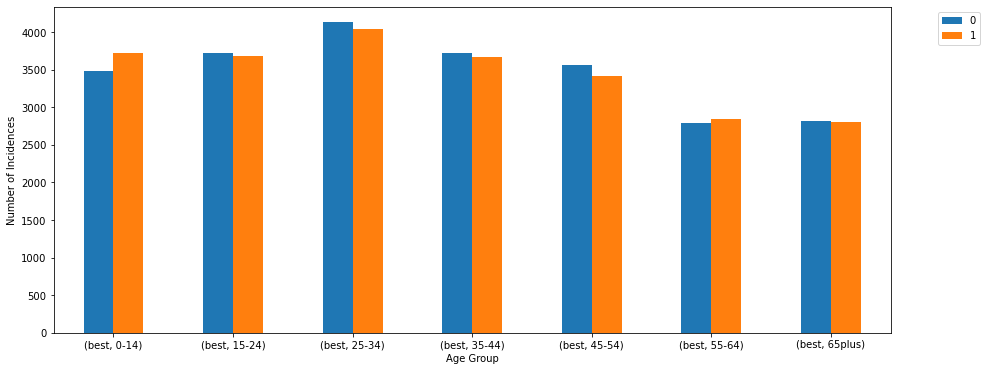

In [37]:
combined_age_plot = pd.concat([age_group_affected_2019, age_group_affected_2020], axis=1)
# plot the DataFrame
labels = [2019, 2020]
combined_age_plot.plot.bar(figsize=(15, 6))

plt.xticks(rotation=0)
plt.xlabel('Age Group')
plt.ylabel('Number of Incidences')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()